In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from preprocess import import_data

sns.set_theme()

In [8]:
df = import_data('train_data.txt')
df.head()

,id,duration,sex,age,num_children,country,acc_type
0,1010286,7,F,40,0,SE,Apt
1,1000152,5,M,NaN,0,NaN,Apt
2,1009019,4,F,39,1,ES,Hotel
3,1007840,5,F,45,0,NL,Hotel
4,1006939,5,M,45,1,UK,Hotel


In [9]:
# Check for missing values
df.isnull().sum()


id                0
duration          0
sex               0
age             994
num_children    971
country         996
acc_type          0
dtype: int64

In [10]:
# Check missing value orientation
null_data = df[df.isnull().any(axis=1)]
null_data.head(20)

,id,duration,sex,age,num_children,country,acc_type
1,1000152,5,M,NaN,0,NaN,Apt
9,1006149,5,F,31,NaN,FI,Apt
11,1006502,9,F,44,NaN,ES,Apt
15,1000476,4,F,48,0,NaN,Hotel
16,1011405,3,M,NaN,1,NaN,Hotel
19,1005786,2,F,41,NaN,SE,Hotel
23,1000175,3,M,NaN,1,NaN,Hotel
25,1004610,4,M,43,0,NaN,Apt
27,1004462,8,M,39,NaN,DK,Apt
28,1008547,9,M,NaN,NaN,IT,Hotel


In [11]:
# Function that plots a stacked bar chart for a single variable

def plot_stacked_bar(column):
    plt.figure()
    
    #convert numerical variables for sorted x-axis in plot
    try:
        df[column] = df[column].apply(lambda x: float(x))
        
    except Exception as e:
        print('pass')
        
    
    
    df.groupby(by=column)['acc_type'].value_counts().unstack().plot(kind='bar', stacked=True)
    plt.ylabel('count')
    plt.show()

<Figure size 432x288 with 0 Axes>

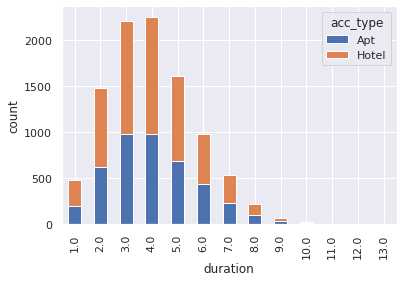

pass


<Figure size 432x288 with 0 Axes>

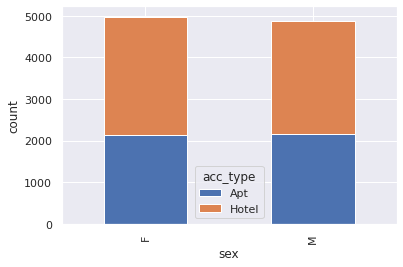

<Figure size 432x288 with 0 Axes>

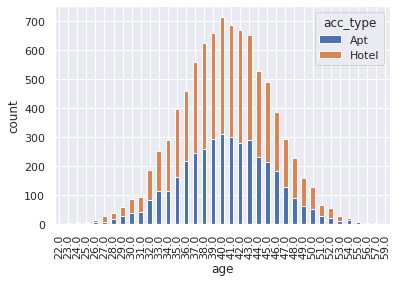

<Figure size 432x288 with 0 Axes>

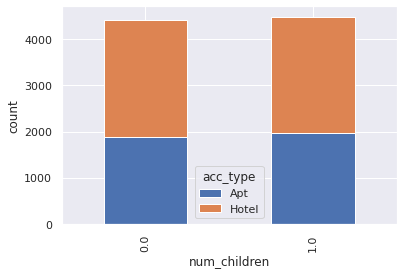

pass


<Figure size 432x288 with 0 Axes>

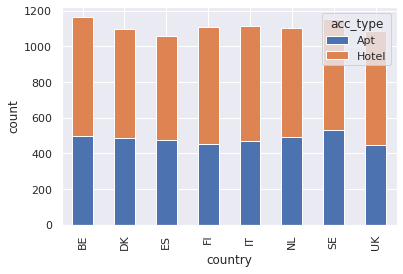

In [12]:
plot_stacked_bar('duration')
plot_stacked_bar('sex')
plot_stacked_bar('age')
plot_stacked_bar('num_children')
plot_stacked_bar('country')

In [13]:
# Prepare df for correlation matrix
df.sex = [1 if sex == 'M' else 0 for sex in df.sex]
df.acc_type = [1 if acc == 'Hotel' else 0 for acc in df.acc_type]

df.id = pd.to_numeric(df.id)
df.duration = pd.to_numeric(df.duration)
df.age = pd.to_numeric(df.age)
df.num_children = pd.to_numeric(df.num_children)




In [14]:
# Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,duration,sex,age,num_children,acc_type
id,1.000000,0.000769,0.013521,-0.021860,-0.007013,0.014468
duration,0.000769,1.000000,0.008632,0.017139,-0.000248,-0.003178
sex,0.013521,0.008632,1.000000,0.009047,0.020868,-0.014056
age,-0.021860,0.017139,0.009047,1.000000,-0.011178,-0.000013
num_children,-0.007013,-0.000248,0.020868,-0.011178,1.000000,-0.011502
acc_type,0.014468,-0.003178,-0.014056,-0.000013,-0.011502,1.000000
